# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 5
# Logistic Regression and PCA 

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A):

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Cancer Classification from Gene Expressions

In this homework assignment, we will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The data set is provided in the file `dataset_hw5.csv`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of Leukemia. The first column contains the cancer type, with 0 indicating the ALL class and 1 indicating the AML class. Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

In the following parts, we will use logistic regression to build a classification model for this data set. We will also use principal components analysis (PCA) to visualize the data and to reduce its dimensions. 



## Part (a): Data Exploration

1. First step is to  split  the observations into an approximate 50-50 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits).

2. Take a peak at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands).  To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.

3. Notice that the results training set contains more predictors than observations. Do you foresee a problem in fitting a classification model to such a data set?

4. A convenient tool to visualize the gene expression data is a heat map. Arrange the rows of the training set so that the 'AML' rows are grouped together and the 'ALL' rows are together. Generate a heat map of the data with expression values from the following genes: 
`D49818_at`, `M23161_at`, `hum_alu_at`, `AFFX-PheX-5_at`, `M15990_at`. By observing the heat map, comment on which of these genes are useful in discriminating between the two classes.

5. We can also visualize this data set in two dimensions using PCA. Find the top two principal components for the gene expression data. Generate a scatter plot using these principal components, highlighting the AML and ALL points in different colors. How well do the top two principal components discriminate between the two classes?



In [2]:
np.random.seed(9001)
df = pd.read_csv('../hwassets/data/dataset_hw5.csv')
msk = np.random.rand(len(df)) < 0.5
data_train = df[msk]
data_test = df[~msk]

Let's take a peak at the training set.

In [3]:
data_train.describe()

,Cancer_type,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.00000,32.00000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.00000
mean,0.375000,-125.281250,-165.250000,5.000000,175.375000,-262.625000,-401.500000,-72.125000,-202.125000,85.843750,...,151.468750,626.28125,-23.31250,311.468750,-47.906250,741.875000,303.875000,0.96875,454.531250,-39.43750
std,0.491869,113.857646,74.106288,143.113084,104.963204,133.640526,155.560796,316.414872,91.076979,101.131696,...,72.956896,327.35866,93.16563,197.598809,57.788468,438.251493,259.216406,55.53057,581.862858,48.78388
min,0.000000,-476.000000,-326.000000,-410.000000,-24.000000,-535.000000,-810.000000,-726.000000,-452.000000,-148.000000,...,36.000000,91.00000,-295.00000,13.000000,-220.000000,67.000000,-42.000000,-207.00000,-33.000000,-190.00000
25%,0.000000,-178.750000,-214.000000,-77.250000,93.250000,-367.750000,-496.750000,-307.500000,-256.000000,4.000000,...,92.750000,399.50000,-78.00000,212.750000,-75.000000,436.500000,98.750000,-23.00000,164.250000,-67.75000
50%,0.000000,-115.000000,-162.500000,7.000000,173.000000,-259.000000,-398.000000,-77.000000,-186.500000,92.500000,...,151.500000,583.00000,-2.50000,254.000000,-52.000000,659.500000,279.500000,6.50000,217.000000,-39.00000
75%,1.000000,-61.000000,-99.500000,67.000000,258.750000,-200.000000,-310.250000,93.250000,-139.000000,165.250000,...,197.500000,747.75000,47.00000,383.000000,-6.500000,1016.000000,396.000000,29.50000,527.000000,-3.50000
max,1.000000,86.000000,-36.000000,312.000000,328.000000,114.000000,-122.000000,709.000000,-24.000000,283.000000,...,341.000000,1455.00000,132.00000,1046.000000,50.000000,1950.000000,1108.000000,81.00000,2484.000000,78.00000


We notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, we normalize each predictor to vary between 0 and 1.

In [4]:
def scale_data(scaler, data):
    data = pd.DataFrame(data=scaler.transform(data), columns=data.columns)
    return data

In [5]:
scaler = MinMaxScaler().fit(data_train)
data_train = scale_data(scaler, data_train)
data_test = scale_data(scaler, data_test)
data_train.describe()

,Cancer_type,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.375000,0.624055,0.554310,0.574792,0.566406,0.419684,0.593750,0.455662,0.583820,0.542561,...,0.378586,0.392435,0.636270,0.288934,0.637384,0.358404,0.300761,0.722114,0.193695,0.561800
std,0.491869,0.202594,0.255539,0.198218,0.298191,0.205918,0.226106,0.220498,0.212797,0.234644,...,0.239203,0.239999,0.218186,0.191286,0.214031,0.232741,0.225406,0.192814,0.231173,0.182029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.528915,0.386207,0.460873,0.333097,0.257704,0.455305,0.291638,0.457944,0.352668,...,0.186066,0.226173,0.508197,0.193369,0.537037,0.196229,0.122391,0.638889,0.078367,0.456157
50%,0.000000,0.642349,0.563793,0.577562,0.559659,0.425270,0.598837,0.452265,0.620327,0.558005,...,0.378689,0.360704,0.685012,0.233301,0.622222,0.314657,0.279565,0.741319,0.099325,0.563433
75%,1.000000,0.738434,0.781034,0.660665,0.803267,0.516179,0.726381,0.570906,0.731308,0.726798,...,0.529508,0.481488,0.800937,0.358180,0.790741,0.503983,0.380870,0.821181,0.222487,0.695896
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data_train.shape

(32, 7130)

We notice that the results training set contains way more predictors (7130) than observations (32). It is clear that we will have problems in fitting a classification model to such a data set. There will be a problem with model identifiability as we do not have enough observations to be able to explain the coefficients we need for each predictor. Clearly, a dimensionality reduction technique is needed.

Let's visualize the gene expression data using a heat map. Specifically, let's generate a heat map of the data with expression values from the following genes: 
`D49818_at`, `M23161_at`, `hum_alu_at`, `AFFX-PheX-5_at`, `M15990_at`.

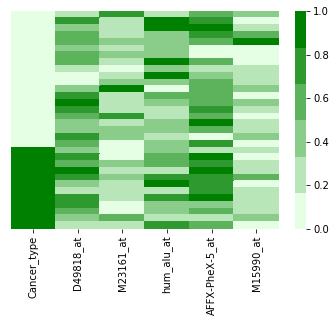

In [7]:
sns.heatmap(data_train.sort_values(by='Cancer_type')
            [['Cancer_type', 'D49818_at', 'M23161_at', 'hum_alu_at',
              'AFFX-PheX-5_at', 'M15990_at']],
            cmap=sns.light_palette('green'), yticklabels=[]);

From the heat map, we can see that the following genes are useful in discriminating between the two classes:
- D49818_at
- AFFX-PheX-5_at
- hum_alu_at

Let's take a look at the top two principal components for the gene expression data.

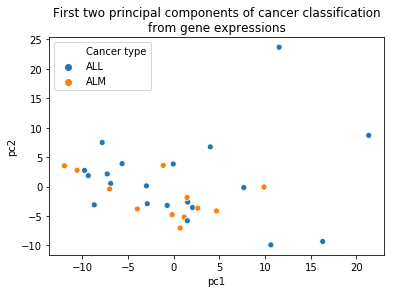

In [8]:
X_train_pca = PCA(n_components=2).fit_transform(data_train)
X_train_pca = pd.DataFrame(X_train_pca).join(data_train['Cancer_type'])
X_train_pca.columns = ['pc1', 'pc2', 'Cancer type']
X_train_pca['Cancer type'] = X_train_pca['Cancer type'].replace(
    to_replace=[0.0, 1.0], value=['ALL', 'ALM'])
ax = sns.scatterplot(x='pc1', y='pc2', hue='Cancer type', data=X_train_pca)
ax.set_title('First two principal components of cancer classification'
             '\nfrom gene expressions')
ax.legend(loc='upper left');

We can see from the scatter plot that the top two principal components do not discriminate well between the two cancer types.

## Part (b): Linear Regression vs. Logistic Regression

Begin by analyzing the differences between using linear regression and logistic regression for classification. For this part, you shall work with a single gene predictor: `D29963_at`.

1. Fit a simple linear regression model to the training set using the single gene predictor `D29963_at`. We could interpret the scores predicted by regression model interpreted for a patient as an estimate of the probability that the patient has the `ALL` type cancer (class 1). Is there a problem with this interpretation?

2. The fitted linear regression model can be converted to a classification model (i.e. a model that predicts one of two binary labels 0 or 1) by classifying patients with predicted score greater than 0.5 into the `ALL` type (class 1), and the others into the `AML` type (class 0). Evaluate the classification accuracy (1 - misclassification rate) of the obtained classification model on both the training and test sets.

3. Next, fit a simple logistic regression model to the training set. How does the training and test calssification accuracy of this model compare with the linear regression model?  Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order not to regularize (use 'C=100000').

4. Plot the quantitative output from linear regression model and the probabilistic output from the logistic regression model (on the training set points) as a function of the gene predictor. Also, display the true binary response for the training set points in the same plot.
Based on these plots, does one of the models appear better suited for binary classification than the other? Explain.



Let's fit a simple linear regression model to the training set using the single gene predictor D29963_at.

In [9]:
y_train = data_train['Cancer_type']
y_test = data_test['Cancer_type']
X_train = data_train['D29963_at'].values.reshape(-1, 1)
X_test = data_test['D29963_at'].values.reshape(-1, 1)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.predict(X_train)

array([0.32341262, 0.20860616, 0.39471348, 0.43096815, 0.39833895,
       0.32945507, 0.3963248 , 0.32864941, 0.43902475, 0.32703809,
       0.46722283, 0.41525779, 0.28030984, 0.34516542, 0.41203516,
       0.39914461, 0.68716784, 0.15623829, 0.13569398, 0.13126285,
       0.41445213, 0.29884001, 0.34959655, 0.18645052, 0.88213742,
       0.50831146, 0.37416916, 0.51878503, 0.29843718, 0.36893238,
       0.20054956, 0.59330852])

We could interpret the scores predicted by regression model interpreted for a patient as an estimate of the probability that the patient has the `ALL` type cancer (class 1). However, there is a problem with this interpretation for the following reasons:

- It could lead to non-sensical values for the scores, that is, probabilities below 0 or above 1.
- There is no logical argument that the output of a linear regression model actually estimates a probability.

Let us now calculate the classification accuracy of the model on both the training and testing sets.

In [11]:
def classify(model, X, threshold=0.5):
    y_pred = model.predict(X)
    y_class = (y_pred > threshold).astype(float)
    return y_class


def print_accuracy(train_acc, test_acc):
    print('Train accuracy: %.2f' % train_acc)
    print('Test accuracy: %.2f' % test_acc)

In [12]:
y_train_lin_reg_pred = classify(lin_reg, X_train, threshold=0.5)
y_test_lin_reg_pred = classify(lin_reg, X_test, threshold=0.5)
train_acc = accuracy_score(y_train, y_train_lin_reg_pred)
test_acc = accuracy_score(y_test, y_test_lin_reg_pred)
print_accuracy(train_acc, test_acc)

Train accuracy: 0.72
Test accuracy: 0.83


Next, we fit a simple logistic regression model to the training set.

In [13]:
def model_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print_accuracy(train_acc, test_acc)

In [14]:
log_reg = LogisticRegression(C=100000)
model_accuracy(log_reg, X_train, X_test, y_train, y_test)

Train accuracy: 0.72
Test accuracy: 0.83


We see that the training and test calssification accuracy of this model are identical to the linear regression model. This is the standard Bayes classifier which takes the approach that assigns each observation to the most likely class, given it's predictor value.

Now we plot the quantitative output from linear regression model and the probabilistic output from the logistic regression model (on the training set points) as a function of the gene predictor. Also, we display the true binary response for the training set points in the same plot.

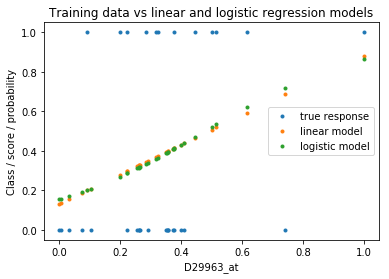

In [15]:
plt.plot(X_train, y_train, '.', label='true response')
plt.plot(X_train, lin_reg.predict(X_train), '.', label='linear model')
plt.plot(X_train, log_reg.predict_proba(X_train)[:, 1], '.',
         label='logistic model')
plt.title('Training data vs linear and logistic regression models')
plt.xlabel('D29963_at')
plt.ylabel('Class / score / probability')
plt.legend();

Based on these plots, the logistic regression model is better suited for binary classification than the linear regression model. This is due to the sigmoid shape of the logistic function versus the straight line of linear regression. On average, the predicted probabilities of the logistic regression are closer to the class values of the true binary response when compared to the scores of the linear regression. Essentially, the logistic regression model will be more sure about the classification decision. 

## Part (c): Multiple Logistic Regression

1. Next, fit a multiple logistic regression model with all the gene predictors from the data set.  How does the classification accuracy of this model compare with the models fitted in Part (b) with a single gene (on both the training and test sets)?  

2. "Use the `visualize_prob` from `HW5_functions.py` to visualize the probabilties predicted by the fitted multiple logistic regression model on both the training and test data sets. The function creates a visualization that places the data points on a vertical line based on the predicted probabilities, with the `ALL` and `AML` classes shown in different colors, and with the 0.5 threshold highlighted using a dotted horizontal line.  Is there a difference in the spread of probabilities in the training and test plots? Are there data points for which the predicted probability is close to 0.5? If so, what can you say about these points?"

Next, we will fit a multiple logistic regression model with all the gene predictors from the data set.

In [16]:
# starter code
from HW5_functions import visualize_prob

In [17]:
X_train = data_train.drop('Cancer_type', axis=1)
X_test = data_test.drop('Cancer_type', axis=1)

In [18]:
log_reg = LogisticRegression(C=100000)
model_accuracy(log_reg, X_train, X_test, y_train, y_test)

Train accuracy: 1.00
Test accuracy: 0.98


We see that the classification accuracy of this model is far better than the models fitted in Part (b) with a single gene on both the training and test sets.

Let us now visualize the probabilties predicted by the fitted multiple logistic regression model on both the training and test data sets.

In [19]:
def plot_probabilities(model, X_train, X_test, y_train, y_test):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    visualize_prob(model, X_train, y_train, ax1)
    visualize_prob(model, X_test, y_test, ax2)
    ax1.set_title('Training data set')
    ax2.set_title('Test data set');

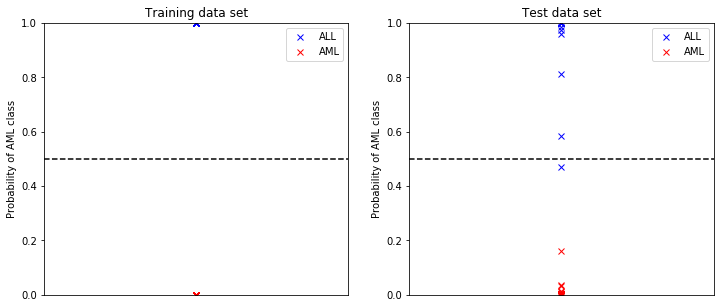

In [20]:
plot_probabilities(log_reg, X_train, X_test, y_train, y_test)

We can see that there a difference in the spread of probabilities in the training and test plots. As expected, for the training points, the probabilities are all very close to the class labels of 0 and 1. The logistic regression model is sure about these predictions since the data was trained on these points. However, for the testing points, the probabilities are spread through the range of zero to one depending on how sure the model is on the predictions.  We can see that there is one data point in the test set for which the predicted probability is close to 0.5. In fact the predicted probability is just less than 0.5 (about 0.47) even though the true class is ALL. This point is misclassified by the logistic regression model.

In [21]:
log_reg.predict_proba(X_test)[:, 1]

array([5.51215850e-04, 3.20803028e-03, 9.09973267e-03, 1.75982769e-04,
       1.88754262e-06, 2.15708572e-05, 1.41088241e-04, 1.43154681e-02,
       1.75922255e-03, 4.09617101e-05, 2.76058872e-03, 4.06330187e-05,
       1.97461990e-03, 3.44885013e-02, 1.50229270e-03, 4.37215406e-03,
       1.94416438e-03, 9.99996926e-01, 9.99993989e-01, 9.85591597e-01,
       9.75114194e-01, 9.99996160e-01, 5.84317825e-01, 9.99055555e-01,
       9.71992765e-07, 2.21823207e-03, 3.23887563e-02, 8.35097322e-06,
       1.36838319e-03, 5.49781763e-05, 2.37801937e-03, 3.69284215e-04,
       2.08723908e-04, 1.22337717e-05, 1.60054982e-01, 9.99978937e-01,
       9.61200939e-01, 8.13839516e-01, 4.69399053e-01, 9.99955151e-01,
       9.99692974e-01])

## Part (d): Analyzing Significance of Coefficients

How many of the coefficients estimated by the multiple logistic regression in the previous problem are significantly different from zero at a *significance level of 95%*? 

Hint: To answer this question, use *bootstrapping* with 100 boostrap samples/iterations.  



As an example, we can fit a regularized logistic regression model on ONLY the first 90 genes. The 90 was a random number chosen to be greater than the observations (we could have done 100, 3000, etc). We only did the first 90 as it would take forever to do all 6033 genes. The reason we used the regularization fit was to get the logistic module to report at least some of the NaN's. Notice how many NaN's there are for the confidence intervals reported below, even with something like regularization! 

This is the reason we need a bootstrap when the number of predictors is greater than the number of observations. Intuitively, that creates a problem in that we do not have enough observations to "represent" each predictor varaible. Hence, the resampling gives us a way to approximate our standard errors.

In [22]:
import statsmodels.discrete.discrete_model as dm
logit = dm.Logit(y_train, X_train.iloc[:, 0:91]).fit_regularized()
print(logit.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.1193736921889176e-10
            Iterations: 39
            Function evaluations: 40
            Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:            Cancer_type   No. Observations:                   32
Model:                          Logit   Df Residuals:                      -59
Method:                           MLE   Df Model:                           90
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:                   1.000
Time:                        13:55:38   Log-Likelihood:            -3.5820e-09
converged:                       True   LL-Null:                       -21.170
                                        LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

C:\Users\covuworie\.virtualenvs\a-2017-AsNAB769\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\covuworie\.virtualenvs\a-2017-AsNAB769\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\covuworie\.virtualenvs\a-2017-AsNAB769\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\covuworie\.virtualenvs\a-2017-AsNAB769\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Let's now conduct a bootstrap analysis and estimate just how many of our coefficients are significant at a significance level of 95%.

In [23]:
def bootstrap(model, X_train, y_train, num_samples=100):
    boot_coefs = np.zeros((X_train.shape[1], num_samples))
    for i in range(num_samples):
        X_train_samples = X_train.sample(n=len(y_train), replace=True)
        y_train_samples = y_train[X_train_samples.index]
        model.fit(X_train_samples, y_train_samples)
        boot_coefs[:, i] = model.coef_
    return boot_coefs

In [24]:
boot_coefs = bootstrap(LogisticRegression(C=100000),
                       X_train, y_train, num_samples=100)

In [25]:
def significant_predictors(X, coefs, sig_level=95.0):
    ci_width = (100.0 - sig_level) / 2.0
    ci_upper = np.percentile(boot_coefs, sig_level + ci_width, axis=1)
    ci_lower = np.percentile(boot_coefs, ci_width, axis=1)
    sig_predictors = []
    for i in range(len(ci_upper)):
        if ci_upper[i] < 0 or ci_lower[i] > 0:
            sig_predictors.append(X.columns[i])
    return sig_predictors

In [26]:
sig_predictors = significant_predictors(X_train, boot_coefs,
                                        sig_level=95.0)
print('Number of significant coefficients =',
      len(sig_predictors))

Number of significant coefficients = 1881


Now let's fit a logistic regression model using these predictors and look at the classification accuracy on the training and test sets.

In [27]:
model_accuracy(LogisticRegression(C=100000),
               X_train[sig_predictors], X_test[sig_predictors],
               y_train, y_test)

Train accuracy: 1.00
Test accuracy: 0.98


We see that the classification accuracy of this model is identical to the model fitted in Part (c). However, it has the added advantage that we have removed redundant predictors.

## Part (e): Dimensionality Reduction using PCA

A reasonable approach to reduce the dimensionality of the data is to use PCA and fit a logistic regression model on the first set of principal components contributing to 90% of the variance in the predictors.

1. How do the classification accuracy values on both the training and tests sets compare with the models fitted in Parts (c) and (d)?  

2. Re-fit a logistic regression model using 5-fold cross-validation to choose the number of principal components, and comment on whether you get better test performance than the model fitted above (explain your observations). 

3. Use the code provided in Part (c) to visualize the probabilities predicted by the fitted models on both the training and test sets. How does the spread of probabilities in these plots compare to those for the models in Part (c) and (d)? 


Let's fit a logistic regression model on the first set of principal components contributing to 90% of the variance in the predictors.

In [28]:
pca = PCA(n_components=0.9, svd_solver='full').fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
model_accuracy(LogisticRegression(C=100000),
               X_train_pca, X_test_pca, y_train, y_test)

Train accuracy: 1.00
Test accuracy: 0.93


We see that the classification accuracy on the training set is identical to that of the models fitted in Parts (c) and (d). However, the test set accuracy is lower.

Now we will re-fit a logistic regression model using 5-fold cross-validation in order to choose the number of principal components.

In [30]:
x_val_scores = []
for frac_variance in np.linspace(0.01, 0.99, 99):
    pca = PCA(n_components=frac_variance)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)

    x_val_scores.append(np.mean(
        cross_val_score(LogisticRegression(C=100000),
                        X_train_pca, y_train, cv=5,
                        scoring='accuracy')))

In [31]:
x_val_n_comps = np.linspace(0.01, 0.99, 99)[np.argmax(x_val_scores)]
x_val_n_comps = pca.n_components_

pca = PCA(n_components=x_val_n_comps)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
print('Cross-validation selected {0} principal components'
      .format(x_val_n_comps))
print('This explains {:.2f} % of the variance'.format(
    100. * pca.explained_variance_ratio_.sum()))
log_reg = LogisticRegression(C=100000)
model_accuracy(log_reg, X_train_pca, X_test_pca,
               y_train, y_test)

Cross-validation selected 30 principal components
This explains 99.03 % of the variance
Train accuracy: 1.00
Test accuracy: 1.00


We see that we have perfect test performance on the model fitted with PCA and it is better than the above model with the restricted set of predictors (1881 predictors). The PCA has projected the predictors onto a lower-dimensional subspace (30-dimensional) that is less than the number of observations. It seems that this model which obtains 99% of the variance is able to explain all of the predictors whereas the model with 1881 predictors still contains some redundant predictors that is contributing to it's poorer performance.

It is helpful to visualize the probabilities predicted by the fitted models on both the training and test sets.

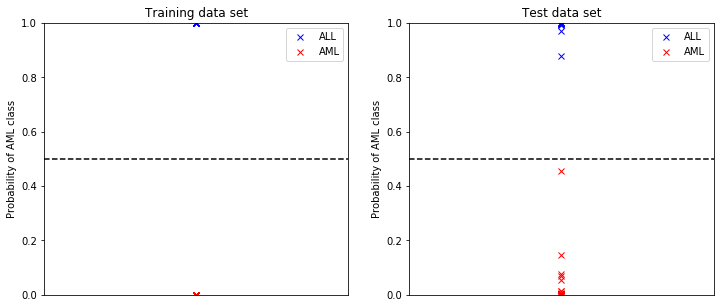

In [33]:
plot_probabilities(log_reg, X_train_pca, X_test_pca, y_train, y_test)

We can see that the spread of probabilities in the test data plot has reduced compared to those for the models in Part (c) and (d). The PCA model is far more sure of it's predictions than the previous models. The most prominent example of this is the point from the 'ALL' class that was previously misclassfied, is way into the positive region now. 

---
 

# APCOMP209a - Homework Question

Suppose we want to conduct PCA on the model matrix $X \in \Re^{n×p}$, where the columns have been suitably set to zero mean. In this question, we consider the squared reconstruction error:

$$  \parallel XQ- XQ_m \parallel ^2 $$

for a suitable set of eigenvectors forming the matrix $Q_m$, as discussed below. Suppose that we conduct eigendecomposition of $X^T X$ and obtain eigenvalues $\lambda_1, \ldots , \lambda_p$ and principal components $Q$, i.e.

$$ X^T X = Q \Lambda Q ^T $$

(1) Suppose that the matrix norm is simply the squared dot product, namely

$$ \parallel A \parallel ^2 = A^T A $$

Then, express the reconstruction error as a sum of matrix products.

(2) Simplify your result from (1) based on properties of the matrices $Q$.

(3) Now let $Q_m$ be the matrix of the first $m < p$ eigenvectors, namely

$$ Q_m = (q_1, \ldots, q_m, 0, \ldots, 0) \in \Re^{p \times p} $$

Thus, $X Q_m$ is the PCA projection of the data into the space spanned by the first $m$ principal components. Express the products $Q^T_m Q$ and $Q^T Q_m$, again using properties of the eigenbasis $q_1, \ldots, q_p$.

(4) Use your results from (3) to finally fully simplify your expression from (2).

(5) Note that the result you obtain should still be a matrix, i.e. this does not define a proper norm on the space of matrices (since the value should be a scalar). Consequently, the true matrix norm is actually the trace of the
above result, namely

$$ \parallel A \parallel ^2  = {\rm trace} (A^T A) $$
Use your result from (4) and this new definition to find a simple expression
for the reconstruction error in terms of the eigenvalues.

(6) Interpret your result from (5). In light of your results, does our procedure for PCA (selecting the $m$ substantially larger eigenvalues) make sense? Why or why not?